# Assignment in Data Analytics

## Authors:  
- Myk Erolf D. Roble
- Shion Suzuki

## Imports

# Sessa Assignment

This notebook contains the analysis of wine quality datasets for red and white wines. The goal is to perform clustering on the datasets to identify patterns and groupings based on various wine features.

## Imports

First, we import the necessary libraries for data manipulation, visualization, and clustering.

In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import seaborn as sns
import nbformat

# Load the datasets
red_wine = pd.read_csv("wine+quality/winequality-red.csv", sep=";")
white_wine = pd.read_csv("wine+quality/winequality-white.csv", sep=";")

# Select relevant numerical features for clustering (excluding quality for now)
features_list = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
            "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
features = features_list[:2]


## Data Exploration

Let's take a look at the first few rows of the normalized red wine dataset. The values are standardized (Z-score normalization) using `StandardScaler()`, which is why most values are negative.

In [192]:
print(red_scaled_df.head())

   fixed acidity  volatile acidity
0      -0.638027          1.433175
1      -0.275504          1.931095
2      -0.638027          1.433175
3      -0.638027          1.101228
4      -0.184873          0.603307


### Empirical Estimation in SESSA

SESSA relies on empirical methods to analyze the structure of data. The Empirical Cumulative Distribution Function (ECDF) is one such method used to estimate the cumulative distribution of a dataset. The ECDF provides a non-parametric way to understand the distribution of a feature, which is crucial for identifying patterns, outliers, and the overall structure of the data.

## Step 2: Preprocessing - ECDF Filtering
To remove extreme values, we apply the Empirical Cumulative Distribution Function (ECDF).
This ensures that only the middle 80% of the data (between the 10th and 90th percentile) is used
for clustering analysis.

In [19]:
def filter_ecdf(data, feature):
    """
    Filters the dataset to keep only the middle 80% of a given feature (10th to 90th percentile).
    Returns the filtered DataFrame.
    """
    # Compute the 10th and 90th percentiles
    lower_bound = np.percentile(data[feature], 10)
    upper_bound = np.percentile(data[feature], 90)

    # Filter the data within this range
    filtered_data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    
    return filtered_data

## Density Distribution

Next, we define a function to plot the density distribution of a log-transformed feature. This helps in understanding the distribution of the feature values.

In [102]:
def plot_density(data, feature, wine_type):
    """
    Plot the density distribution of the log-transformed feature.
    """
    log_data = np.log(data[feature])  # Log-transform
    log_data = log_data[np.isfinite(log_data)]  # Remove infinities

    plt.figure(figsize=(8, 5))
    sns.kdeplot(log_data, fill=True, color="red" if wine_type == "Red" else "blue", alpha=0.5)
    
    plt.xlabel(f"log({feature})")
    plt.ylabel("Density")
    plt.title(f"Density Distribution of {feature} ({wine_type} Wine)")
    plt.grid(True)
    plt.show()

## Silhouette Score for Optimal Clusters

To determine the optimal number of clusters, we calculate the silhouette score for different numbers of clusters. The silhouette score measures how similar an object is to its own cluster compared to other clusters.

In [159]:
def find_optimal_clusters(data, max_k=10):
    silhouette_scores = []
    
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_k+1), silhouette_scores, marker='o', linestyle='--')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for Optimal Clusters")
    plt.grid(True)
    plt.show()
    
    best_k = np.argmax(silhouette_scores) + 2  # Because index starts at 0
    print(f"Optimal number of clusters: {best_k}")
    return best_k

## ECDF for Each Column

We calculate the ECDF for each column and convert it back to a single DataFrame. This helps in understanding the distribution of each feature in the dataset.

In [193]:
# Apply ECDF filtering to all features
red_filtered = red_wine.copy()
white_filtered = white_wine.copy()

for feature in features:
    red_filtered = filter_ecdf(red_filtered, feature)
    white_filtered = filter_ecdf(white_filtered, feature)


## Step 3: Feature Scaling
Since different features have different scales, we apply standardization using `StandardScaler`. 
This transformation ensures that all features have a mean of 0 and a standard deviation of 1, making clustering more effective.

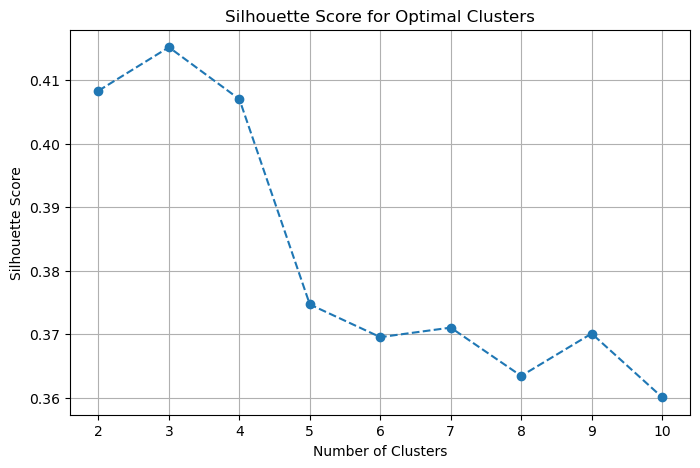

Optimal number of clusters: 3


In [194]:

# Normalize the filtered data
scaler = StandardScaler()
red_scaled = scaler.fit_transform(red_filtered[features])
white_scaled = scaler.fit_transform(white_filtered[features])

# Convert back to DataFrame
red_scaled_df = pd.DataFrame(red_scaled, columns=features)
white_scaled_df = pd.DataFrame(white_scaled, columns=features)

# Now use the filtered and scaled data for clustering
best_k_red = find_optimal_clusters(red_scaled_df)


## Step 4: Clustering Algorithms
We apply three clustering methods:
 - **K-Means Clustering**: Partitions data into `k` clusters using the centroid method.\n"
 - **DBSCAN (Density-Based Clustering)**: Identifies clusters based on density regions.\n"
 - **Agglomerative Hierarchical Clustering**: Builds a hierarchy of clusters using the Ward linkage method.


## Perform Kmeans Clustering

Finally, we perform clustering on the dataset. The optimal number of clusters is determined using the silhouette score. We then apply KMeans clustering with the optimal number of clusters.

In [163]:
def perform_kmeans_clustering(data, n_clusters, wine_type):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    
    # Add cluster labels to the DataFrame
    data["Cluster"] = labels
    
    # Plot clustering results using first two features (for visualization)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette="bright", s=50)
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.title(f"K-Means Clustering ({wine_type} Wine)")
    plt.legend(title="Cluster")
    plt.grid(True)
    plt.show()
    sns.pairplot(data, hue="Cluster", palette="bright")
    plt.show()
    
    return data


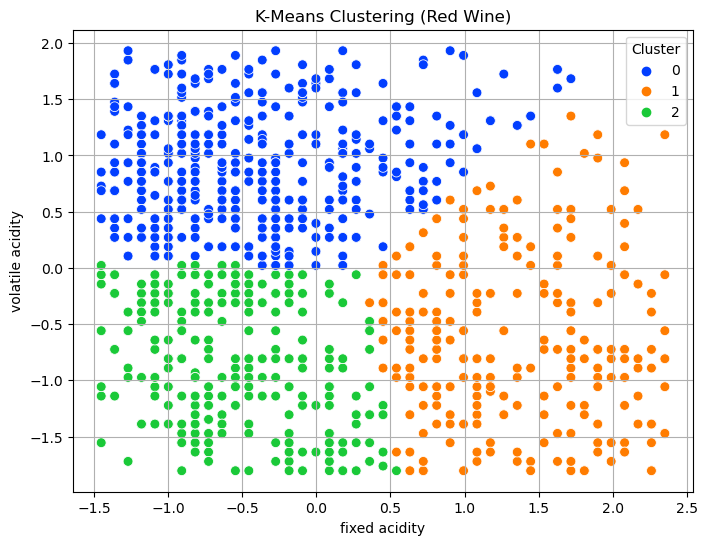

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


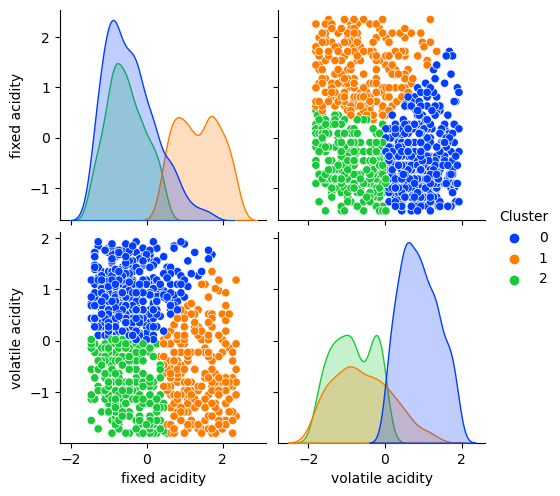

,volatile acidity,fixed acidity,Cluster
0,1.433175,-0.638027,0
580,0.686294,0.630804,0
581,0.603307,-0.819289,0
583,1.557655,-0.456766,0
585,0.603307,-0.819289,0
586,0.686294,0.630804,0
587,1.848108,0.721435,0
589,0.354347,-1.181812,0
591,1.101228,-0.819289,0
593,1.101228,-0.819289,0


In [183]:
red_clustered = perform_kmeans_clustering(red_scaled_df, best_k_red, "Red")
red_clustered[['volatile acidity', 'fixed acidity', 'Cluster']].sort_values('Cluster').head(20)

### Compute for silhoutte score

In [61]:
# Compute Silhouette Score
def compute_silhouette(data, labels):
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1 and -1 in unique_labels:
        # Exclude noise points
        filtered_data = data[labels != -1]
        filtered_labels = labels[labels != -1]
        if len(np.unique(filtered_labels)) > 1:
            return silhouette_score(filtered_data, filtered_labels)
        else:
            return "Silhouette score not valid (only one cluster after removing noise)"
    elif len(unique_labels) > 1:
        return silhouette_score(data, labels)
    else:
        return "Silhouette score not valid (only one cluster or too much noise)"

## DBSCAN Clustering

In [146]:
def plot_dbscan(data, labels, title):
    plt.figure(figsize=(8, 6))
    unique_clusters = np.unique(labels)
    palette = sns.color_palette("viridis", len(unique_clusters) - 1)  # Exclude noise
    
    for i, cluster in enumerate(unique_clusters):
        if cluster == -1:
            color = 'black'  # Noise points should be black, not 'none'
            label = 'Noise'
        else:
            color = palette[i-1]
            label = f'Cluster {cluster}'
        
        # Filter rows belonging to the cluster
        cluster_points = data.loc[labels == cluster, ["fixed acidity", "volatile acidity"]]

        # Scatter plot using proper column names
        plt.scatter(cluster_points["fixed acidity"], cluster_points["volatile acidity"], 
                    color=color, label=label, alpha=0.5)

    plt.xlabel("Fixed Acidity")
    plt.ylabel("Volatile Acidity")
    plt.title(title)
    plt.legend()
    plt.show()

## Find the best Epsilon to use

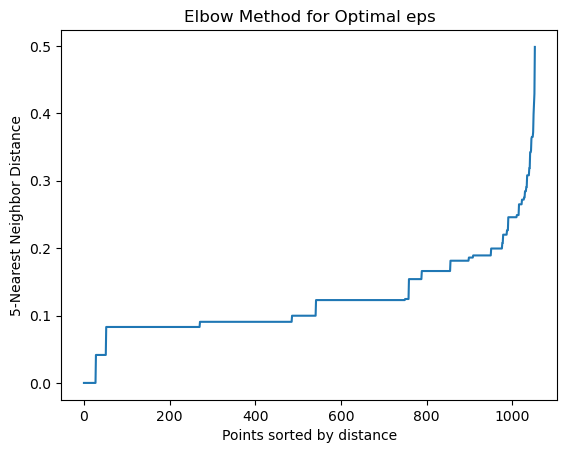

In [172]:
from sklearn.neighbors import NearestNeighbors

def find_best_eps(data, k=5):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(data)
    distances, _ = neighbors_fit.kneighbors(data)
    
    # Sort and plot the k-distance
    distances = np.sort(distances[:, -1])  # Get the kth nearest distances
    plt.plot(distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"{k}-Nearest Neighbor Distance")
    plt.title("Elbow Method for Optimal eps")
    plt.show()

# Find best eps
find_best_eps(red_scaled_df, k=5)

## Step 5: Evaluating Clustering Performance
- To assess how well the clustering algorithm performed, we compute the **Silhouette Score**. <br>
- A higher score indicates better-defined clusters. DBSCAN results may have noise points (`-1` labels),
so we exclude these when computing the silhouette score.<br>

Red Wine Clusters: [-1  0  1  2]
Red Wine Silhouette Score: 0.5761758983856107


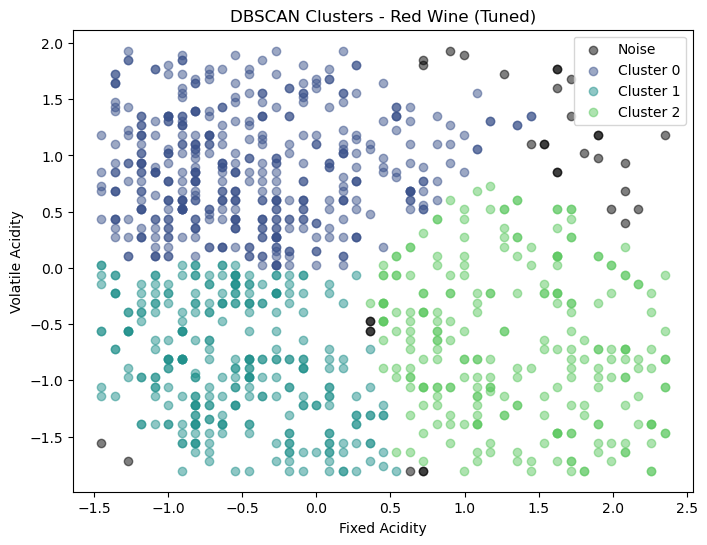

In [187]:
best_eps_red = 0.3  # Adjust based on elbow method

dbscan_red = DBSCAN(eps=best_eps_red, min_samples=10).fit(red_scaled_df)

print("Red Wine Clusters:", np.unique(dbscan_red.labels_))

print("Red Wine Silhouette Score:", compute_silhouette(red_scaled_df, dbscan_red.labels_))

plot_dbscan(red_scaled_df, dbscan_red.labels_, "DBSCAN Clusters - Red Wine (Tuned)")

## Agglomerative Clustering

## Step 6: Visualization <br>
To better understand the clustering results, we use scatter plots and dendrograms: <br>
- **ECDF Plots**: Show the cumulative distribution of each feature.<br>
- **Scatter Plots**: Display clustering results for the first two features (e.g., `fixed acidity` vs. `volatile acidity`).<br>
- **Dendrograms**: Illustrate hierarchical clustering structures. 

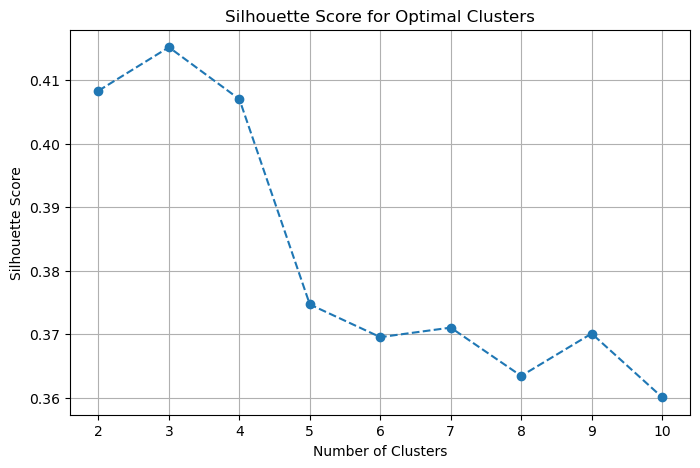

Optimal number of clusters: 3


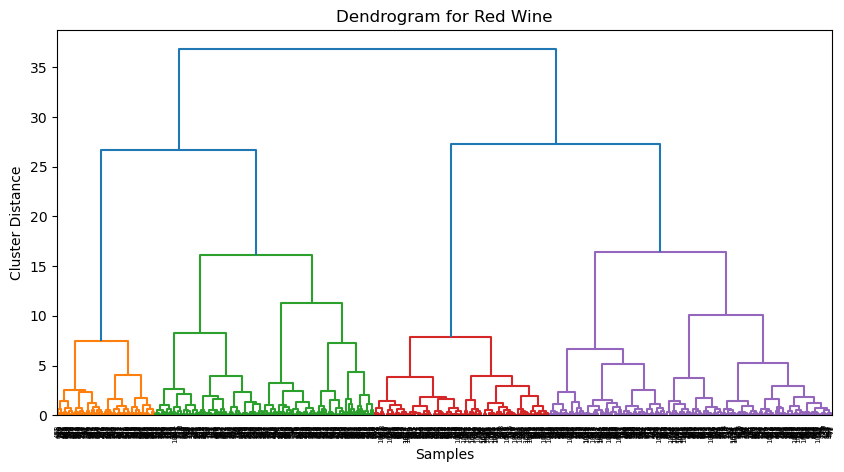

In [197]:
def apply_agglomerative_clustering(data, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
    labels = model.fit_predict(data)
    return labels
n_clusters_red = find_optimal_clusters(red_scaled_df)

red_labels = apply_agglomerative_clustering(red_scaled_df, n_clusters_red)

def plot_dendrogram(data, wine_type):
    plt.figure(figsize=(10, 5))
    Z = linkage(data, method='ward')
    dendrogram(Z)
    plt.title(f"Dendrogram for {wine_type} Wine")
    plt.xlabel("Samples")
    plt.ylabel("Cluster Distance")
    plt.show()
plot_dendrogram(red_scaled_df, "Red")